<a href="https://colab.research.google.com/github/ele9996/NetworkDynamicsAndLearningLabs/blob/main/HMW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np 
import networkx as nx
import matplotlib.pyplot as plt
import scipy as sp
import random

#Problem 1

##1.1

Plot the graph and variables definition

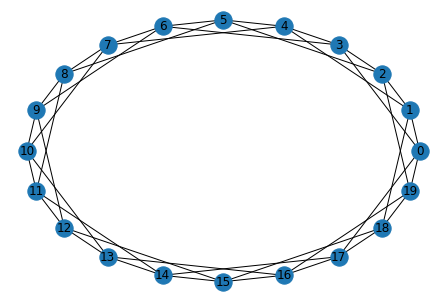

In [39]:

nodes=20 #500
k=4


G = nx.Graph()
nx.add_cycle(G, range(nodes))
for n in range(nodes):
    other = n+3
    if other>=nodes:
        other-=nodes
    G.add_edge(other,n)

nx.draw_circular(G, with_labels=True)




 ![Dataset Description](https://raw.githubusercontent.com/ele9996/NetworkDynamicsAndLearningLabs/main/SIR.JPG)


In [40]:
#Array and variables definition

beta=0.3
p=0.7
weeks=2#15
N= 10#100


#array containing the total infected people each week for all simulations 
#tot_inf = np.array([[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]])
tot_inf = np.array([[0.,0.]])

In [41]:
#simulation of epidemics

def MySim(weeks, nodes,n_status,n_infected): 

  n_status_next=n_status
  print("initial_n_status_next=n_staus: {}".format(n_status_next))
  
  for i in range(weeks):
    print("settimana {}".format(i))

    for node in range(nodes):
      print("node:{}".format(node))
      m=0
      

      #find infected neighbors number(m)--> se non è già lui infetto
      for neigh in G.neighbors(node):
        if n_status[neigh]==1:
          m+=1
      print("m={}".format(m))
      #with the following if chain I see if my node can change status
      random_prob=random.random()
      print("random probability={}".format(random_prob))
      print("known prob: {}".format((1-beta)**m))
      if random_prob > (1-beta)**m:
        n_status_next[node]=1  #--> della week successiva non della stessa forse perchè altrimenti uno che ha cambiato stato viene considerato all'interno dello stesso tempo un vicino infetto...ma in realà non lo è ancora dovrebbe diventare n_status[node][week]

      print("status_next={}".format(n_status_next))
      print("status={}".format(n_status))
      #if m>0 and yeah==True:
       # print(n_status)
      #catena if (ci sarà anche parte in cui si riprendono)

    

    infected=np.count_nonzero(n_status_next==1)
    print("infected number in the week: {}".format(infected))
    n_infected[i]=infected
    n_status=n_status_next
  print("fine")
  print("final infected array for every week:{}".format(n_infected))
  return n_infected




In [42]:
#main loop

for n in range(N):
  print("inizio simulazione {}".format(n))
  #n status contains the status of each node
  #status are defined as {0:'S', 1:'I', 2:'R'}
  n_status=np.zeros(nodes)
  
  #array containing the number of infected people each week in one simulation of 100
  n_infected=np.zeros(weeks)

  
  #I randomly search for 10 nodes which will start as infected
  random_index=random.sample(range(0,nodes-1),10)
  print("the nodes I selected to be infected are: {}".format(random_index))

  for index in random_index:
    n_status[index]=1

  #I run the simulation
  n_infected=MySim(weeks,nodes,n_status,n_infected)
  #print(n_infected)
  tot_inf=np.concatenate((tot_inf, [n_infected]), axis = 0) 

print("totale infettati per ogni settimana per simulazione:{}".format(tot_inf))

avg_inf=np.average(tot_inf,axis=0)

avg_inf

inizio simulazione 0
the nodes I selected to be infected are: [1, 14, 2, 3, 17, 12, 5, 13, 4, 15]
initial_n_status_next=n_staus: [0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0.]
settimana 0
node:0
m=3
random probability=0.46793750856259797
known prob: 0.3429999999999999
status_next=[1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0.]
status=[1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0.]
node:1
m=3
random probability=0.34790353465943724
known prob: 0.3429999999999999
status_next=[1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0.]
status=[1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0.]
node:2
m=3
random probability=0.45428286376733384
known prob: 0.3429999999999999
status_next=[1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0.]
status=[1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0.]
node:3
m=3
random probability=0.04226961115059524
known prob: 0.3429999999999999
status_next=[1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0

array([13.18181818, 16.36363636])